In [156]:
import numpy as np
import matplotlib.pyplot as plt

### Zad1

In [176]:
def generate_symmetric_matrix(n):
    matrix = np.random.uniform(-100, 100, (n, n))
    matrix = np.triu(matrix) + np.triu(matrix).T
    m = np.full((n, n), 1)
    np.fill_diagonal(m, 2)
    return matrix / m


In [177]:
mat = generate_symmetric_matrix(5)

In [178]:
print(mat)

[[-87.7633626  -50.11102619  12.30045263  74.07489189  41.84673878]
 [-50.11102619  56.97070497 -37.43317792  90.91876855 -20.79284427]
 [ 12.30045263 -37.43317792  50.89206362  33.24624732  44.41393663]
 [ 74.07489189  90.91876855  33.24624732  -7.54260672 -29.38912843]
 [ 41.84673878 -20.79284427  44.41393663 -29.38912843 -95.84346424]]


In [180]:
eig_val, eig_vec = np.linalg.eig(mat)
print(eig_val)

[-193.59034257  -89.75596312  -17.5820792    84.96002983  132.68169008]


In [181]:
from time import perf_counter
def time_it(func, *args, **kwargs):
    t = perf_counter()
    func(*args, **kwargs)
    return perf_counter() - t

In [182]:
def power_method_with_eps(matrix, eps=0.000001):
    n = matrix.shape[0]
    x = np.full(n, 1)
    eig_v = 1
    last = 0
    while abs(eig_v - last) > eps:
        x = matrix.dot(x)
        last, eig_v = eig_v, np.max(np.abs(x))
        x /= eig_v

    return eig_v, x / np.linalg.norm(x)

In [183]:
def power_method_with_iter(matrix, k=100):
    n = matrix.shape[0]
    x = np.full(n, 1)
    eig_v = 1
    for _ in range(k):
        x = matrix.dot(x)
        eig_v = np.max(np.abs(x))
        x /= eig_v

    return eig_v, x / np.linalg.norm(x)

In [184]:
power_method_with_eps(mat)

(193.59034222805982,
 array([ 0.65461781,  0.30269394,  0.16280446, -0.50754039, -0.44243571]))

In [185]:
power_method_with_iter(mat)

(193.59034257099484,
 array([ 0.65461782,  0.30269393,  0.16280446, -0.50754039, -0.44243571]))

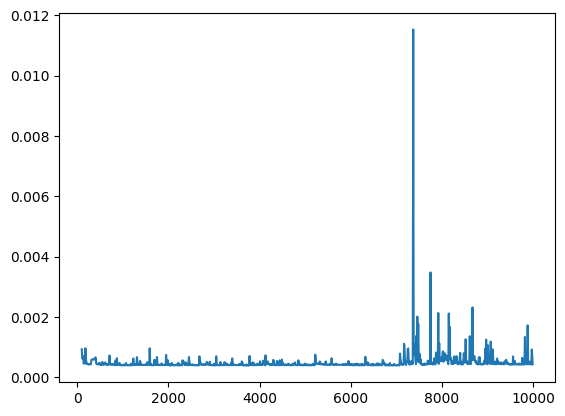

In [186]:
time = []
for i in range(100, 10000, 10):
    time.append(time_it(power_method_with_eps, mat))

plt.plot(list(range(100, 10000, 10)), time)
plt.show()

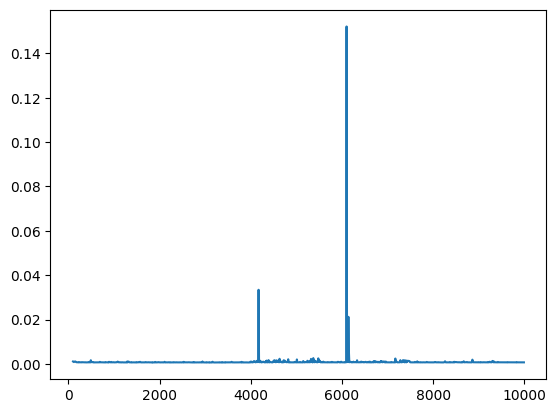

In [187]:
time = []
for i in range(100, 10000, 10):
    time.append(time_it(power_method_with_iter, mat))

plt.plot(list(range(100, 10000, 10)), time)
plt.show()

## Zad2

In [196]:
def inverse_power_method(sigma, matrix):
    n = matrix.shape[0]
    matrix2 = np.linalg.inv(matrix - sigma*np.identity(n))
    eig_v, eig_vector = power_method_with_eps(matrix2)
    return (1 / eig_v) + sigma, eig_vector

In [202]:
inverse_power_method(-17, mat)

(-16.417920791414293,
 array([-0.62887339,  0.37834227,  0.51836672, -0.43839062,  0.02202252]))